In [3]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt


## Generate sample data

In [4]:
np.random.seed(42)
X = np.linspace(0, 10, 50)
y = 2 * X + 1 + np.random.normal(0, 1, 50)  # Linear relation with some noise

# Add a constant term for the intercept
X = sm.add_constant(X)

## OLS regression

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.975
Method:                 Least Squares   F-statistic:                     1903.
Date:                Mon, 09 Sep 2024   Prob (F-statistic):           2.81e-40
Time:                        16:03:22   Log-Likelihood:                -66.142
No. Observations:                  50   AIC:                             136.3
Df Residuals:                      48   BIC:                             140.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0644      0.258      4.120      0.0

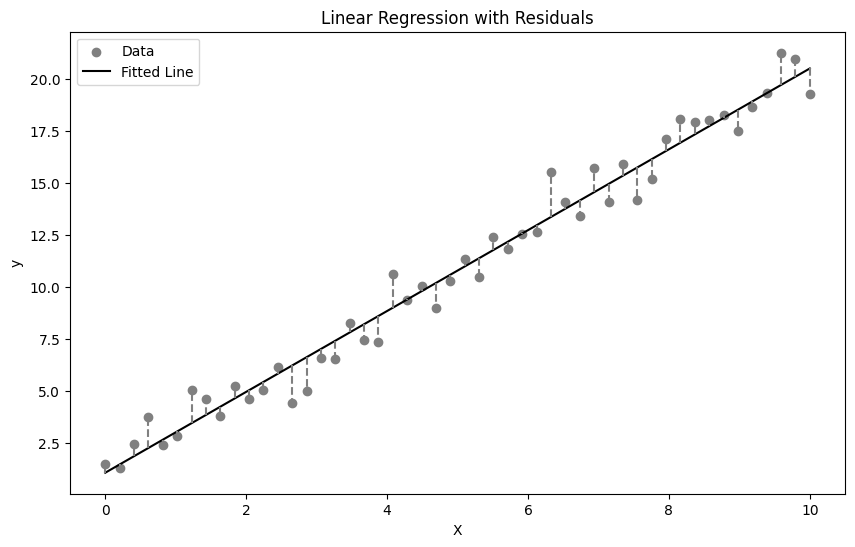

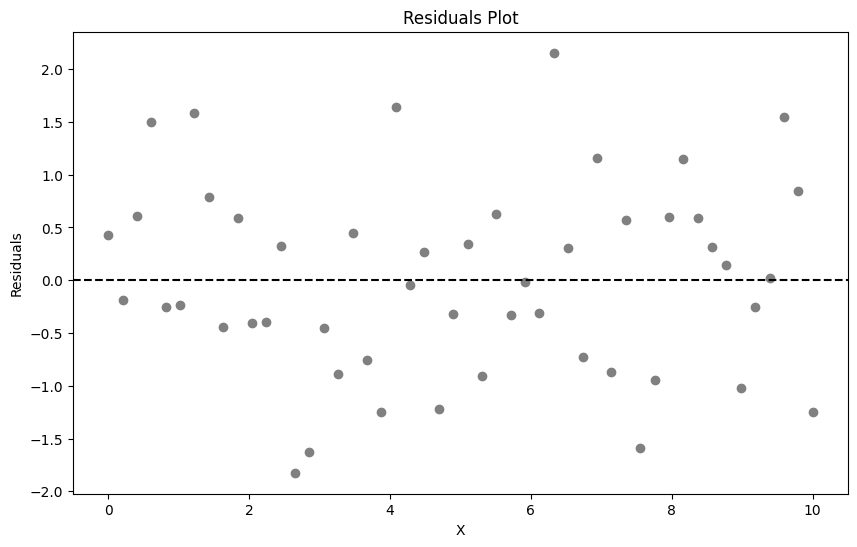

In [6]:
# Fit the model
model = sm.OLS(y, X).fit()

# Print the summary of the regression
print(model.summary())

# Get the predicted values
y_pred = model.predict(X)

# Calculate residuals
residuals = y - y_pred

# Plot the original data and the fitted line
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 1], y, label='Data', color='gray')
plt.plot(X[:, 1], y_pred, color='black', label='Fitted Line')

# Plot the residuals as vertical lines
for i in range(len(X)):
    plt.vlines(X[i, 1], y_pred[i], y[i], color='gray', linestyle='dashed')

plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.title('Linear Regression with Residuals')
plt.savefig('../charts/linear_regression_with_residuals.eps', format='eps')
plt.show()

# Plot residuals
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 1], residuals, color='gray')
plt.axhline(0, color='black', linestyle='--')
plt.xlabel('X')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.savefig('../charts/residuals_plot.eps', format='eps')
plt.show()
